In [1]:
import plotly.express as px
import pandas as pd

# Création d'un DataFrame avec les données
df = pd.DataFrame({
    "x": [1, 2, 3, 1, 2, 3],
    "y": [1, 2, 3, 3, 2, 1],
    "frame": [1, 1, 1, 2, 2, 2]  # Frames pour l'animation
})

# Création du graphique avec animation_frame
fig = px.line(df, x="x", y="y", animation_frame="frame", title="Animation avec Plotly Express")

# Afficher le graphique dans Jupyter Notebook
fig.show()


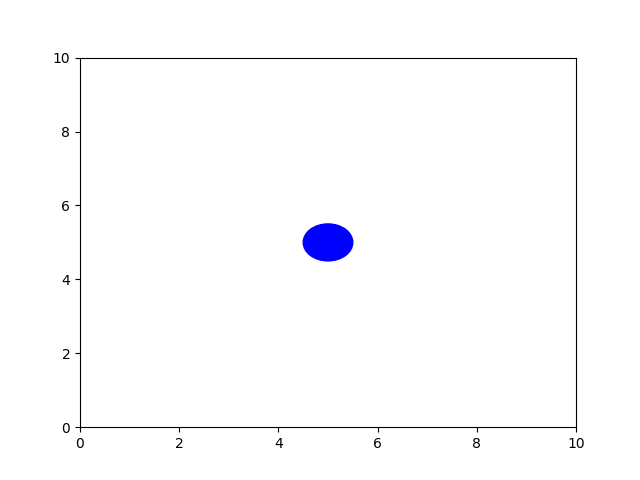

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from IPython.display import display

# Variables globales
window_size = 10  # Taille de la fenêtre
radius = 0.5      # Rayon du disque
position = np.array([5.0, 5.0])  # Position initiale (x, y)
velocity = np.array([0.1, 0.1])  # Vitesse initiale (vx, vy)
is_running = False  # Variable d'état pour contrôler si l'animation est en cours

# Création de la figure
fig, ax = plt.subplots()
ax.set_xlim(0, window_size)
ax.set_ylim(0, window_size)
circle = plt.Circle(position, radius, color='blue')
ax.add_patch(circle)

# Fonction pour mettre à jour l'animation
def update(frame):
    global position, velocity, is_running
    if not is_running:
        return circle,  # Ne rien faire si l'animation est arrêtée
    
    # Mise à jour de la position
    position[:] += velocity
    
    # Gestion des rebonds
    if position[0] - radius < 0 or position[0] + radius > window_size:
        velocity[0] *= -1  # Inverser la vitesse sur l'axe X
    if position[1] - radius < 0 or position[1] + radius > window_size:
        velocity[1] *= -1  # Inverser la vitesse sur l'axe Y
    
    # Mise à jour de la position du cercle
    circle.center = position
    return circle,  # Retourne un tuple avec le cercle pour blit=True

# Animation avec Matplotlib
ani = FuncAnimation(fig, update, blit=True, interval=50, frames=1000)

# Widgets de contrôle
start_button = widgets.Button(description="Démarrer")
stop_button = widgets.Button(description="Arrêter")
reset_button = widgets.Button(description="Réinitialiser")
x_slider = widgets.FloatSlider(value=5.0, min=0.0, max=10.0, step=0.1, description='X :')
y_slider = widgets.FloatSlider(value=5.0, min=0.0, max=10.0, step=0.1, description='Y :')
vx_slider = widgets.FloatSlider(value=0.1, min=-1.0, max=1.0, step=0.01, description='Vx :')
vy_slider = widgets.FloatSlider(value=0.1, min=-1.0, max=1.0, step=0.01, description='Vy :')

# Fonctions des boutons
def start_callback(change):
    global is_running
    is_running = True
    ani.event_source.start()  # Lance l'animation

def stop_callback(change):
    global is_running
    is_running = False
    ani.event_source.stop()  # Arrête l'animation

def reset_callback(change):
    global position, velocity, is_running
    is_running = False
    ani.event_source.stop()  # Arrêter l'animation avant la réinitialisation
    position[:] = [x_slider.value, y_slider.value]
    velocity[:] = [vx_slider.value, vy_slider.value]
    circle.center = position
    ani.event_source.start()  # Relancer l'animation avec les nouveaux paramètres

# Associer les boutons à leurs fonctions
start_button.on_click(start_callback)
stop_button.on_click(stop_callback)
reset_button.on_click(reset_callback)

# Disposition des widgets
controls = widgets.VBox([
    widgets.HBox([start_button, stop_button, reset_button]),
    x_slider, y_slider, vx_slider, vy_slider
])

# Afficher les widgets et le graphique
display(controls)
plt.show()
